In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import h5py as h5
import psana
import time

In [2]:
# Load the h5 file
#with h5.File("/sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata/xppl1001021_Run0024.h5", 'r') as sourceFile:
#    names = list(sourceFile['/Sums'].keys())
#    for name in names:
#        print(name)

    #epix5= np.array(sourceFile['/Sums/epix_alc5_calib'])
    
    #elayStageLocation = np.array(sourceFile['/epicsAll/sd_delay'])

In [17]:
exp_name = "xppl1001021"
run_num = 37
det_name = "jungfrau1M_alcove"

ds = psana.DataSource('exp={}:run={}'.format(exp_name, run_num))
env = ds.env()
det = psana.Detector(det_name, env)

numberToLoad = 1000

tic = time.time()

with h5.File("./output/jungfrau1M_run_{}.h5".format(run_num), 'w') as target:
    counter = 0
    for evt in ds.events():
        holder = det.image(evt)
        
        target.create_dataset("{}".format(counter), data=holder)
        
        if counter % 100 == 0:
            toc = time.time()
            print("toc - tic = {:.2f}".format(toc - tic))
        
        counter += 1
        if counter >= numberToLoad:
            break

toc - tic = 3.39
toc - tic = 20.31
toc - tic = 37.39
toc - tic = 54.19
toc - tic = 71.04
toc - tic = 87.97
toc - tic = 104.77
toc - tic = 121.35
toc - tic = 138.04
toc - tic = 154.82


# Load data and apply threshold 

In [74]:
result.shape

(1064, 1030)

In [76]:
with h5.File("./output/jungfrau1M_run_{}.h5".format(run_num), 'r') as source:
    result = np.zeros((1064, 1030))
    
    for idx in range(1000):
        data = np.array(source['{}'.format(idx)])
        result[np.logical_and(data >= 0.5, data <= 10)] += data[np.logical_and(data >= 0.5, data <= 10)]

In [77]:
np.save("./output/run37_jungfrau_1000image.npy", result)

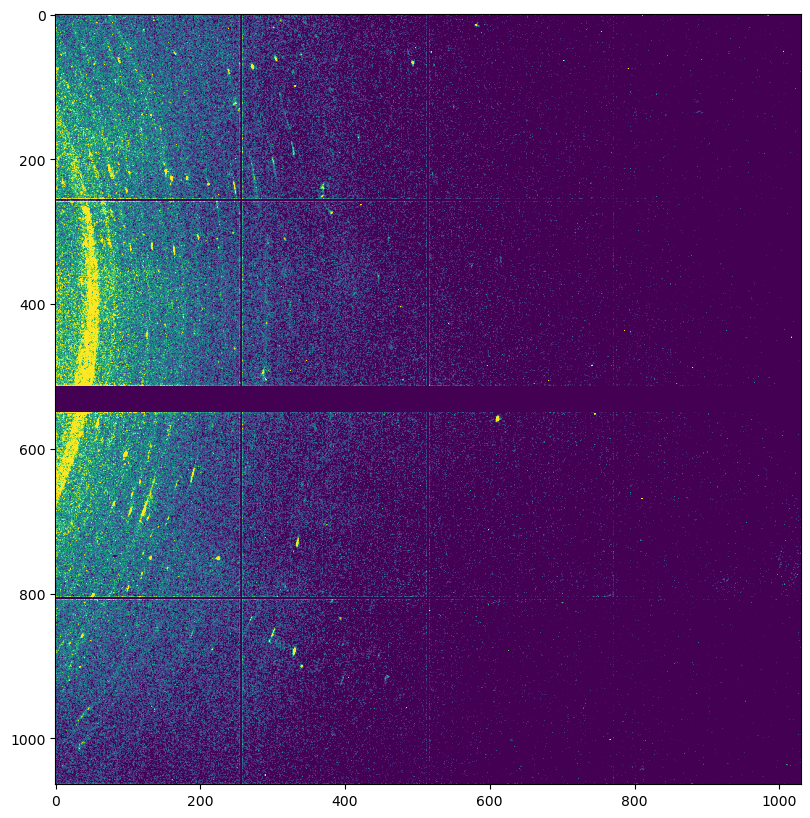

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(result, vmin=50, vmax=150)
plt.show()

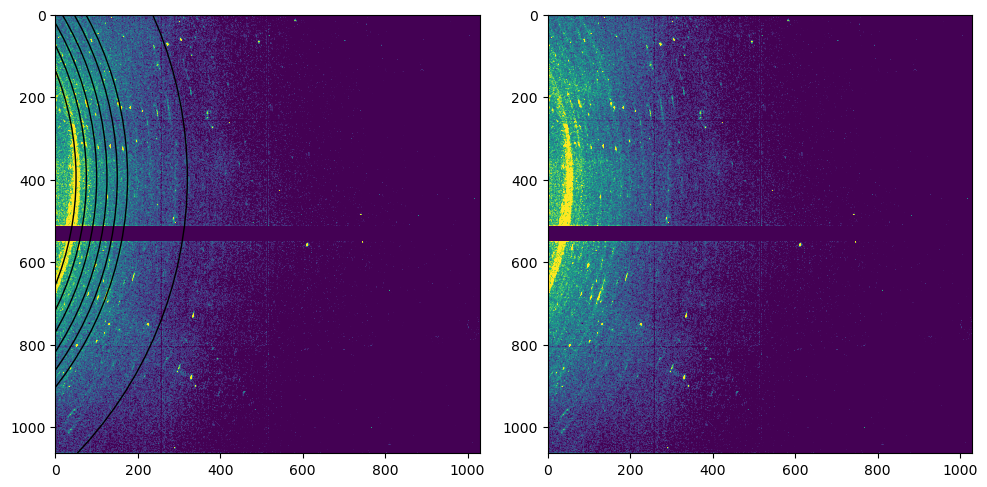

In [103]:
center = (-650, 395)

circle1 = mpat.Circle(center, 700, fill=False)
circle2 = mpat.Circle(center, 725, fill=False)
circle3 = mpat.Circle(center, 750, fill=False)
circle4 = mpat.Circle(center, 775, fill=False)
circle5 = mpat.Circle(center, 800, fill=False)
circle6 = mpat.Circle(center, 825, fill=False)
circle7 = mpat.Circle(center, 970, fill=False)


fig, ax = plt.subplots(ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)
ax[0].imshow(result, vmin=50, vmax=150)
ax[0].add_patch(circle1)
ax[0].add_patch(circle2)
ax[0].add_patch(circle3)
ax[0].add_patch(circle4)
ax[0].add_patch(circle5)
ax[0].add_patch(circle6)
ax[0].add_patch(circle7)

ax[1].imshow(result, vmin=50, vmax=150)

plt.tight_layout()
plt.show()